

# Project:  Investigate TMDB movies Dataset


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>  In this notebook the investigation will be about the TMDB dataset that contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings , revenue, cast and reviews.

>
> We can analyze this data and extract imporrtant information to answer these questions


In [178]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling


### General Properties
 The intial shape of our data set is 10866 row and 21 column 
 We see the info and the datatype of every column 
 and which column that has null values

In [179]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
#Load data set and name it movies
movies=pd.read_csv("tmdb-movies.csv")


In [180]:
#Show the information about the dataset
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [181]:
movies.describe()
#We can see that many budgets and revenues equal to zeroes about 50% but if we drop them the dataset will lose many of its assets which will destroy another columns(features)

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [182]:
#print the dimensions of the dataset
print (movies.shape)
#preview some rows 
movies.tail()

(10866, 21)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0



### Data Cleaning (Replace this with more specific notes!)
In this section we tend to make the data cleaner by dropping the unnecessary columns in our investigations,
dropping rows with null values
drop duplicated values
Add Column net profit which depends on two other columns 
Fix the data in the genre column that contain multiple genres in one row so we split them



In [183]:
#drop the unneeded columns in our investigation
movies.drop(['imdb_id','homepage','tagline','keywords','release_date','overview'],axis=1,inplace=True)

In [184]:
#drop duplicated data
movies.duplicated().value_counts()
movies.drop_duplicates(inplace=True)

In [185]:
#Derive net profit column by using revenue adj and budget adj
movies['net_profit']=movies['revenue_adj']-movies['budget_adj']
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   popularity            10865 non-null  float64
 2   budget                10865 non-null  int64  
 3   revenue               10865 non-null  int64  
 4   original_title        10865 non-null  object 
 5   cast                  10789 non-null  object 
 6   director              10821 non-null  object 
 7   runtime               10865 non-null  int64  
 8   genres                10842 non-null  object 
 9   production_companies  9835 non-null   object 
 10  vote_count            10865 non-null  int64  
 11  vote_average          10865 non-null  float64
 12  release_year          10865 non-null  int64  
 13  budget_adj            10865 non-null  float64
 14  revenue_adj           10865 non-null  float64
 15  net_profit         

In [186]:
#check the null data in every column
movies.isna().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
net_profit                 0
dtype: int64

In [187]:
#drop rows that contain null genres
movies.dropna(subset=['genres'], inplace=True)

In [188]:
#drop rows that contain null cast or null director
movies.dropna(subset=['cast'], inplace=True)
movies.dropna(subset=['director'], inplace=True)

In [189]:
#split the multiple genres in genres column that are followed by |
dfgenre=movies.copy()
df = dfgenre[dfgenre['genres'].str.contains('|')]
df1= df.copy()

In [190]:
#view results of the splitting
df1['genres']=df['genres'].apply(lambda x: x.split("|"))
df1['genres']

0        [Action, Adventure, Science Fiction, Thriller]
1        [Action, Adventure, Science Fiction, Thriller]
2                [Adventure, Science Fiction, Thriller]
3         [Action, Adventure, Science Fiction, Fantasy]
4                             [Action, Crime, Thriller]
                              ...                      
10861                                     [Documentary]
10862                        [Action, Adventure, Drama]
10863                                 [Mystery, Comedy]
10864                                  [Action, Comedy]
10865                                          [Horror]
Name: genres, Length: 10731, dtype: object

In [191]:
#explode the dataframe to get each row a single value
dfgenre['genres']=df1['genres']
dfgenre=dfgenre.explode('genres')

In [192]:
# print the shape of the original movie dataframe and the exploded dataframe
print(movies.shape)
print(dfgenre.shape)

(10731, 16)
(26753, 16)


# Visualization and Relevant Statistics
- In this section we make some statistics to get more valuable information from the dataset

Text(0.5, 1.0, 'Description of budget values for each corresponding genre ')

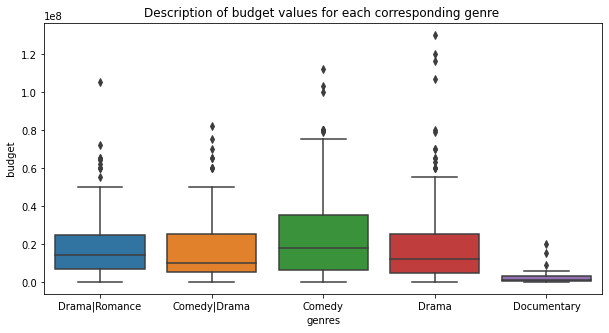

In [205]:
import seaborn as sns
df_1= df.groupby(['genres'])[['id']].count().sort_values(by=['id'],ascending=False)[0:5]
df_new=df[df['genres'].isin(df_1.index.values.tolist())]
df_new1=df_new[df_new['budget']>0]
plt.figure(figsize=(10,5))# figure plot
sns.boxplot(y=df_new1['budget'],x=df_new1['genres'])
plt.ylabel(" budget ")
plt.xlabel("genres")
plt.title("Description of budget values for each corresponding genre ")

,id
genres,
Comedy,292
Comedy|Drama,116
Documentary,29
Drama,317
Drama|Romance,147


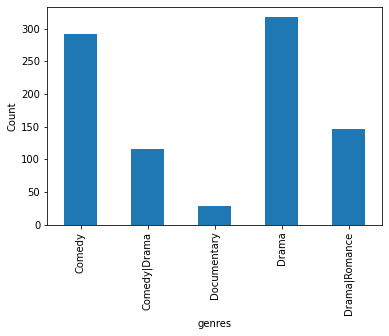

In [208]:
df_new1.groupby(['genres'])['id'].count().plot(kind='bar').set_ylabel('Count')
df_new1.groupby(['genres'])['id'].count().to_frame()

,revenue
count,2.260000e+03
mean,2.104047e+07
std,5.326443e+07
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,1.232492e+07
max,6.118994e+08


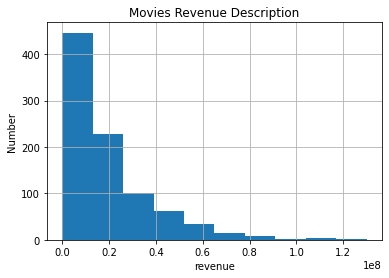

In [212]:
ax=df_new1['budget'].hist()
ax.set_ylabel('Number')
ax.set_xlabel('revenue')
ax.set_title('Movies Revenue Description')
pd.DataFrame(df_new['revenue'].describe())

<a id='eda'></a>
## Exploratory Data Analysis



### Which genres are most popular from year to year? (Question 1)
- We can see the geners of the films in each year we can conclude that in most of years the producers tends to produce comedy or drama 
-plotting the counts of each top genre anually


In [120]:
#show the most produced generes every year
dfgenre.groupby("release_year")['genres'].value_counts()

release_year  genres  
1960          Drama       13
              Action       8
              Comedy       8
              Horror       7
              Romance      6
                          ..
2015          Music       33
              TV Movie    20
              History     15
              War          9
              Western      6
Name: genres, Length: 1045, dtype: int64

In [121]:
#get the top popular genre in each single yeat
popular_genre=dfgenre.groupby(['release_year','genres']).size().groupby(level='release_year').nlargest(1).reset_index(level=0,drop=True)

In [122]:
#convert the dataseries to dataframe
popular_genre=popular_genre.to_frame()


In [123]:
#make dataseries in shape of size for the genres and their count in most popular genre to plot it
pgenre=popular_genre.groupby('genres').size()

Text(0.5, 1.0, 'Top Anually genre')

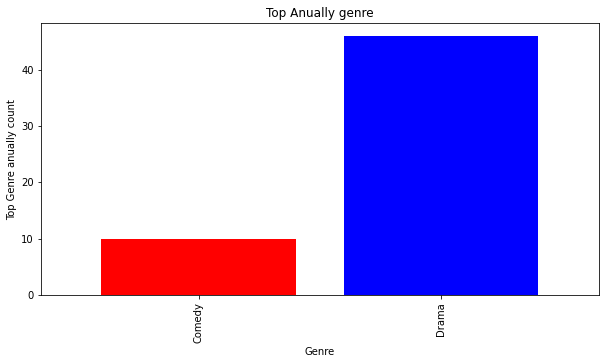

In [156]:
pgenre.plot.bar(figsize=(10,5), width=0.8 ,color=['red','blue'])
plt.xlabel("Genre")
plt.ylabel("Top Genre anually count")
plt.title("Top Anually genre")

In [72]:
pencoded=popular_genre.copy()
pencoded=pencoded.reset_index()
pencoded.genres=pencoded.genres.replace({'Drama':2, "Comedy":1 })
pencoded

,release_year,genres,0
0,1960,2,13
1,1961,2,16
2,1962,2,21
3,1963,1,13
4,1964,2,20
5,1965,2,20
6,1966,1,16
7,1967,1,17
8,1968,2,19
9,1969,2,13


Text(0.5, 1.0, 'Most Popular Genre ')

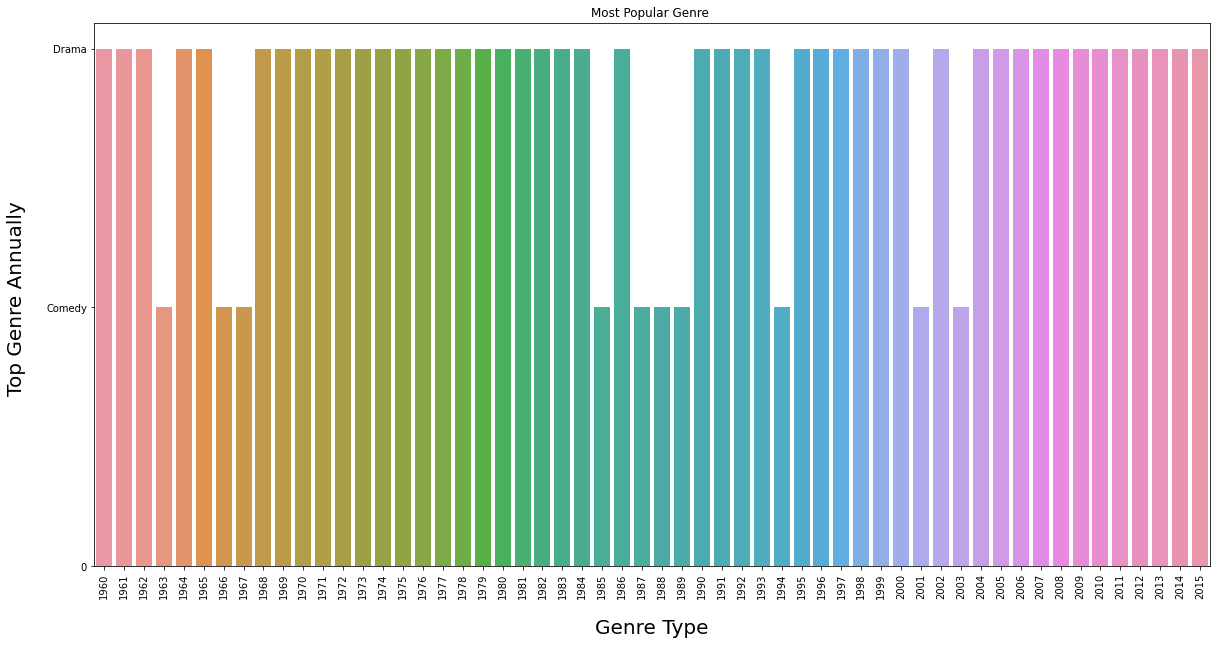

In [126]:
import seaborn as sns
plt.figure(figsize=(20,10))# figure plot
ax = plt.axes() # main axes
sns.barplot(data = pencoded, x=pencoded['release_year'], y=pencoded['genres']);
plt.xlabel('Genre Type', fontsize=20, labelpad=20)
plt.xticks(rotation=90)
plt.yticks([0,1,2],[0,'Comedy','Drama']) #change values on the ticks
plt.ylabel('Top Genre Annually ', fontsize=20, labelpad=20);
plt.title('Most Popular Genre ')

### NetProfit Trend Over years (Question 2)
- we can see the profit trend , we can see the maximum profit in 2015 and the minimum profit in 1966 , we can see that almost the net profit increases as the time passes


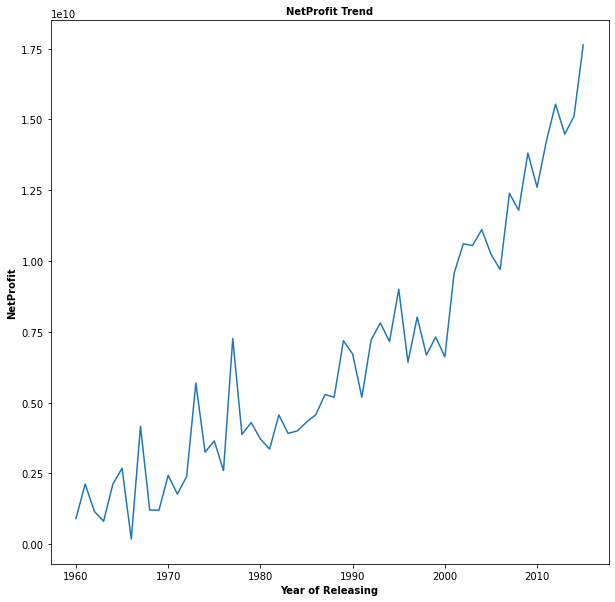

In [138]:
# save the net profit in each year in profit Trend data series and plot it
profitTrend=movies.groupby('release_year')['net_profit'].sum()
plt.figure(figsize=(10,10))
plt.xlabel('Year of Releasing',fontsize = 10, weight = "bold")
plt.ylabel('NetProfit',fontsize = 10, weight = "bold")
plt.title('NetProfit Trend',fontsize = 10, weight = "bold")
plt.plot(profitTrend)


In [22]:
#Print the Years that have the maximum and minimum profits
print("Max Profit Year ", (profitTrend.idxmax()))
print("Min Profit Year ", (profitTrend.idxmin()))

Max Profit Year  2015
Min Profit Year  1966


# Top 10 Movies in vote counts and population (Question 3)
- We can see that the top votes arent the same the top popular it is different but not totally different


In [139]:
#function to plot the top ten for any feature with respect to another feature
def Topten(x1,y1,top=10):
    data=movies.sort_values(by=[y1],ascending=False)[:top]
    plt.figure(figsize=[15,10])
    sns.barplot(data=data, y=x1,x=y1,orient='h')
    plt.title(f'Top {top} {x1} by {y1} '.title())
    plt.xlabel(y1.title(),fontsize = 10, weight = "bold")
    plt.ylabel(x1.title(),fontsize = 10, weight = "bold")

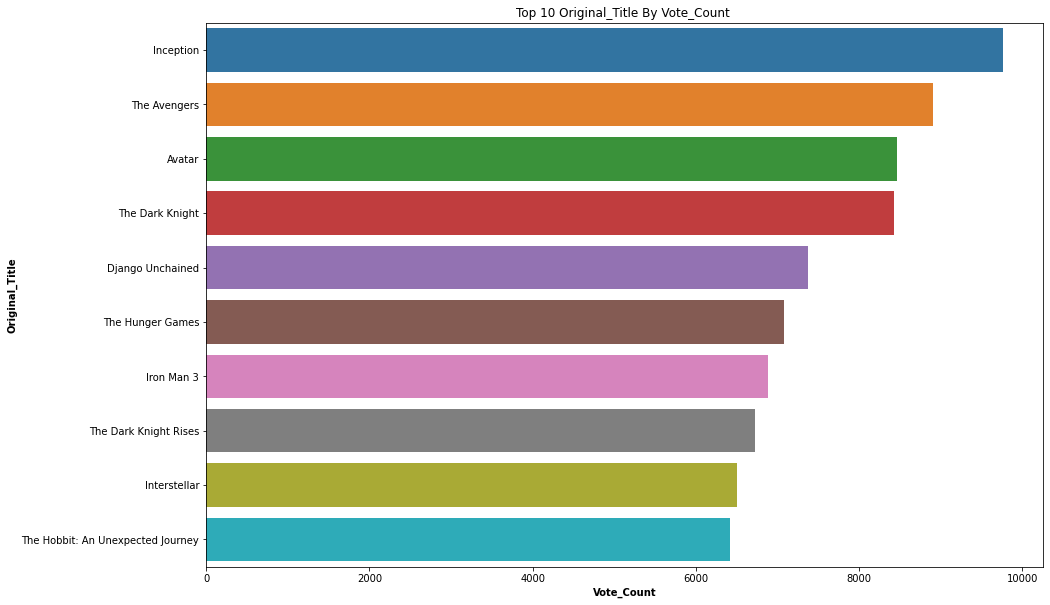

In [140]:
#plot topten movies based on vote counts
Topten('original_title','vote_count')

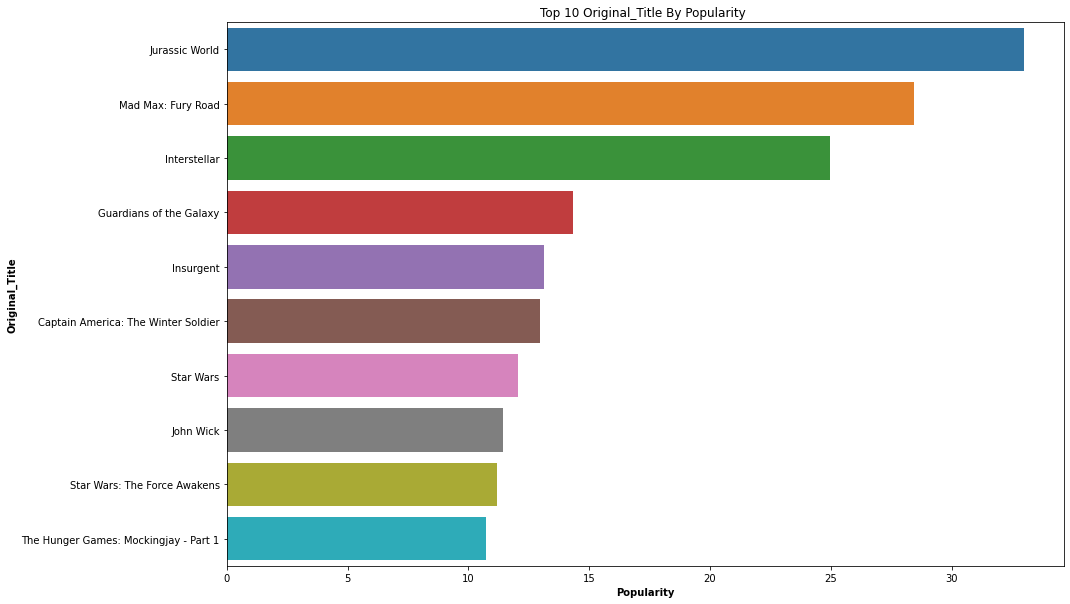

In [141]:
#Topten movies based on popularity
Topten('original_title','popularity')


# Top Directors & Production Companies which have the highest net profit movies (Question4)
- We can see the top directors that have the movies with the highest profits (The Most Successful)
- we can see the top production companies which have the highest net profits movies

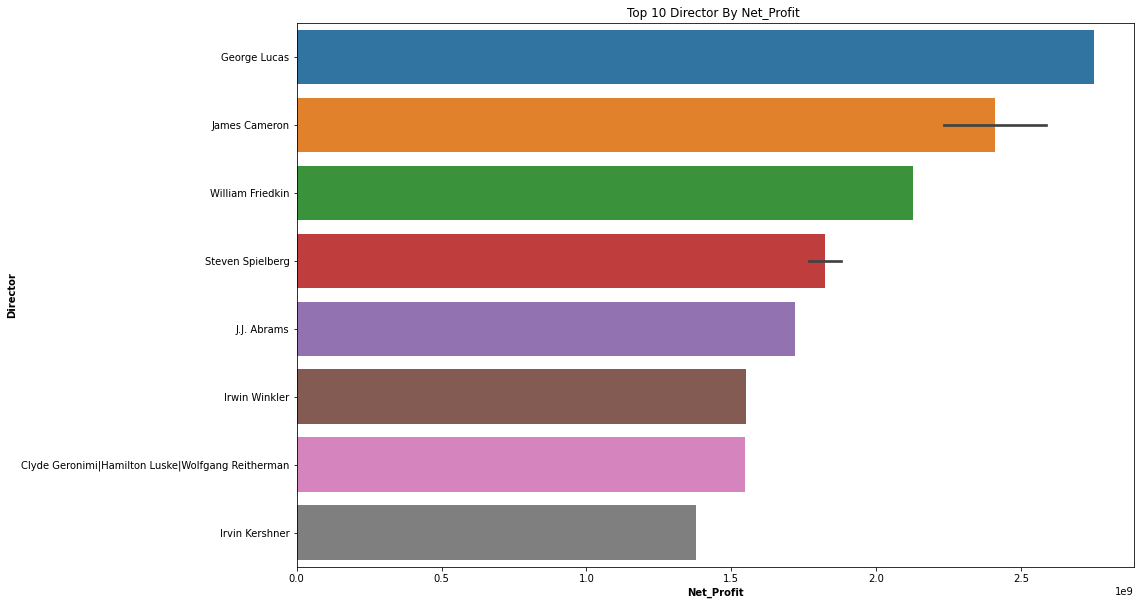

In [142]:
#Top ten directors based on the net profit they earn
Topten('director','net_profit')

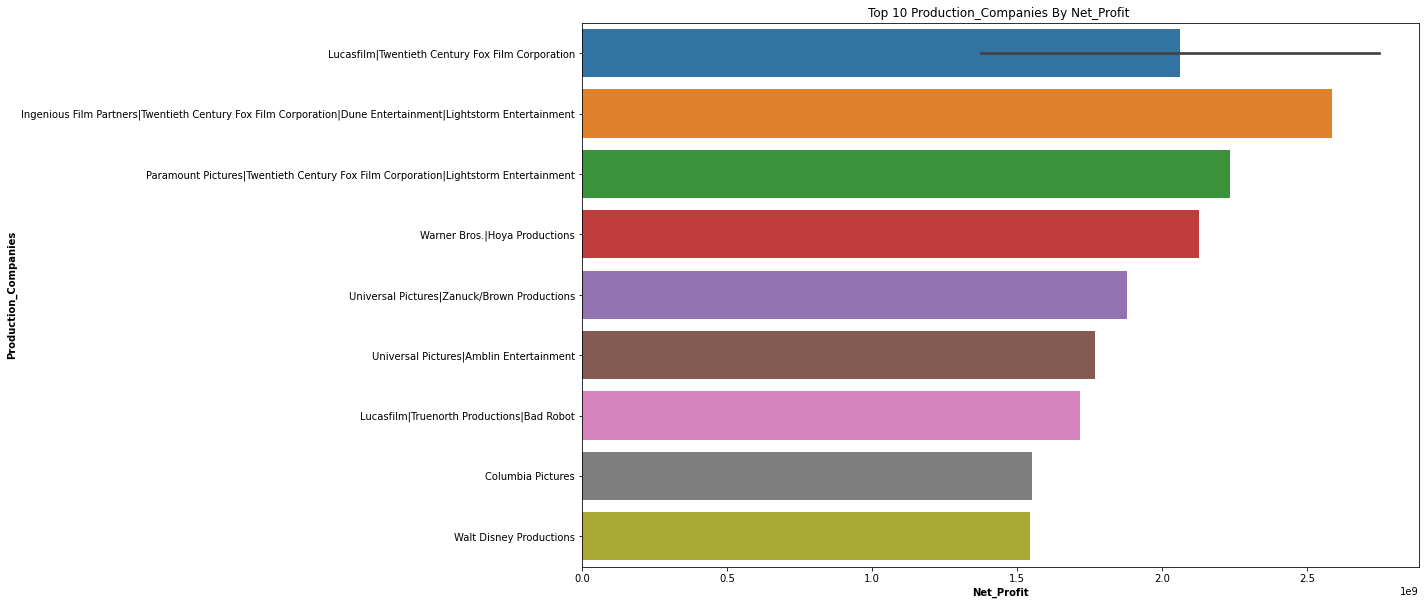

In [143]:
#Top ten production companies based on net profit
Topten('production_companies','net_profit')

<a id='conclusions'></a>
## Conclusions

> In this notebook after investigations
- we can see the profit trend , we can see the maximum profit in 2015 and the minimum profit in 1966 , we can see that almost the net profit increases as the time passes
- We can see the geners of the films in each year we can conclude that in most of years the producers tends to produce comedy or drama 
- Of course there are another investigations could be made and with higher accuracy but it is just the begining and by my progress in this course i will be able to make better investigations

- We can see that the top votes arent the same the top popular it is different but not totally different
- We can see the top directors that have the movies with the highest profits (The Most Successful)


In [30]:
from subprocess import call
call(['python','-m','nbconvert','investigate-a-dataset-template.ipynb'])

1